In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [3]:
df=pd.read_csv('cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [4]:
df.shape

(77, 16)

In [5]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 8.8+ KB


In [7]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [8]:
df.describe(include='all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Rice Krispies,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


In [9]:
df.drop(['name'], axis=1, inplace=True)

In [10]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [40]:
#in this analysis, we shall be answering the following questions.
#which nutritional quantity influeces a higher rating on cereal?
#Which cereal manufacturer has the highest ratings?
#Who is the most popular cereal manufacturer?

In [12]:
#1. which nutritional quantity influeces a higher rating on cereal?
#Does an increase in sugar lead to a higher rating?
sugar_df=df[['sugars','rating',]]
sugar_df

,sugars,rating
0,6,68.402973
1,8,33.983679
2,5,59.425505
3,0,93.704912
4,8,34.384843
...,...,...
72,3,39.106174
73,12,27.753301
74,3,49.787445
75,3,51.592193


Text(0.5, 1.0, 'Cereals Ratings per Sugar(g)')

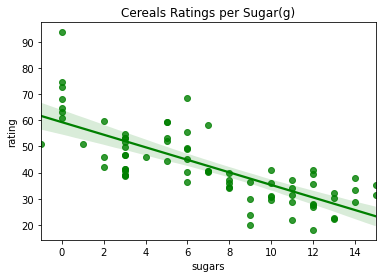

In [16]:
sns.regplot(sugar_df['sugars'],sugar_df['rating'], color='green').set_title("Cereals Ratings per Sugar(g)")

In [18]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(sugar_df['sugars'],sugar_df['rating'])

In [20]:
print('The linear coefficient =',r_value)
print('The slope =',slope)

The linear coefficient = -0.7596746584301078
The slope = -2.4008198943590098


In [ ]:
#There is a significant negative linear relationship between the amount of sugars in the cereal and its rating. These means that For every 1g increase in sugar, we can expect a deduction of 2 points from the rating.

In [21]:
#Does an increase in vitamins lead to a higher rating?
vitamin_df=df[['vitamins','rating',]]
vitamin_df

,vitamins,rating
0,25,68.402973
1,0,33.983679
2,25,59.425505
3,25,93.704912
4,25,34.384843
...,...,...
72,25,39.106174
73,25,27.753301
74,25,49.787445
75,25,51.592193


Text(0.5, 1.0, 'Cereals Ratings per vitamins(g)')

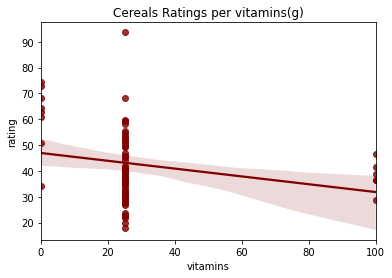

In [22]:
sns.regplot(vitamin_df['vitamins'],vitamin_df['rating'], color='maroon').set_title("Cereals Ratings per vitamins(g)")

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(vitamin_df['vitamins'],vitamin_df['rating'])

In [25]:
print('The linear coefficient =',r_value)
print('The slope =',slope)

The linear coefficient = -0.24054361076908154
The slope = -0.15123563401797174


In [26]:
#Does an increase in calories lead to a higher rating?
calories_df=df[['calories','rating',]]
calories_df

,calories,rating
0,70,68.402973
1,120,33.983679
2,70,59.425505
3,50,93.704912
4,110,34.384843
...,...,...
72,110,39.106174
73,110,27.753301
74,100,49.787445
75,100,51.592193


Text(0.5, 1.0, 'Cereals Ratings per calories(kcal)')

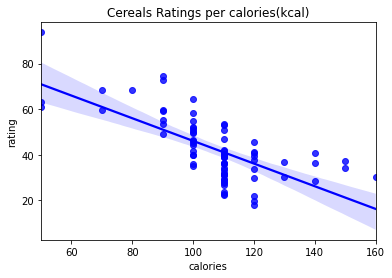

In [28]:
sns.regplot(calories_df['calories'],calories_df['rating'], color='Blue').set_title("Cereals Ratings per calories(kcal)")

In [30]:
slope, intercept, r_value, p_value, std_err = stats.linregress(calories_df['calories'],calories_df['rating'])

In [31]:
print('The linear coefficient =',r_value)
print('The slope =',slope)

The linear coefficient = -0.6893760311652585
The slope = -0.4970131897956427


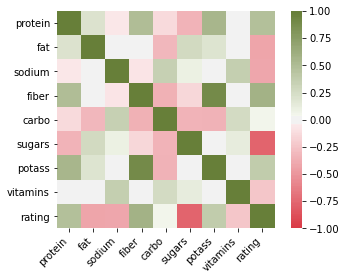

In [39]:
nutrition_df=df[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
corr = nutrition_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 105, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

from the heatmap we can deduce that, There is a significantly negative correlation between sugars and rating as established earlier. There is also a strong negative correlation betweeen fat and sodium and rating. and a slight negative correlation in vitamins. In like manner, there is a strong positive correlation between fiber and protein and rating. and a slight positivity in potassium. This suggests that the rating was based more on the nutritional benefits of the cereal, instead of on the taste.

In [ ]:
#Which cereal manufacturer has the highest ratings?

Text(0.5, 1.0, 'Ratings of Cereals by Manufacturers')

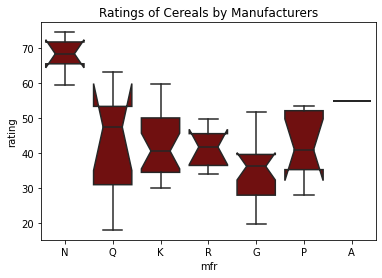

In [45]:
rating_df=df[['mfr','rating']]
sns.boxplot(data=rating_df,x='mfr',y='rating',notch=True,showfliers=False,color='maroon').set_title("Ratings of Cereals by Manufacturers")

from the boxplot we can conclude that Nabisco's median cereal rating is significantly higher than the rest, making it the manufacturer with the highest average rating.

In [46]:
rating_df[rating_df['mfr']=='A']

,mfr,rating
43,A,54.850917


In [ ]:
#Who is the most popular cereal manufacturer?

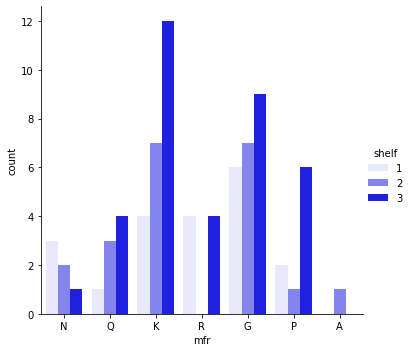

In [51]:
mfr_shelf=df[['mfr','shelf']]
ax = sns.catplot(x="mfr", kind='count', hue="shelf", data=mfr_shelf,color='blue')

The most popular manufacturer can be defined as the one with the most cereals on shelf no 2. Kelloggs appears to have the highest number of shelf no 2 cereals among the other producers, hence they can be considered the most popular manufacturers.

In Conclusion:

Increased sugar levels does not influences higher ratings.

Nabisco is the most rated manufacturer.

Kelloggs is the most popular manufacturer.


Acknowledgements:
CognoRise InfoTech
Tan Ting Xuan